# Correlation Exploration on Movie Dataset 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import matplotlib 

# Uses the ggplot style
plt.style.use("ggplot")

import seaborn as sns 

from matplotlib.pyplot import figure 

%matplotlib inline 

# Adjusting the figure size.
matplotlib.rcParams["figure.figsize"] = (25,20)


**The main objective of this project is to find the correlations between the gross revenue aggregated by a movie and a number of features that are involved in the production of the movie.** 

Before we do that, we need to read the data, check for inconsistencies, and then work upon them. 

# Data Cleaning 

In [2]:
# Reading the data
df = pd.read_csv(r"C:\Users\Kanishka\Desktop\Project 3\movies.csv")

In [3]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# Checking for null values 
for column in df.columns:
    print(column, df[column].isnull().sum())

name 0
rating 77
genre 0
year 0
released 2
score 3
votes 3
director 0
writer 3
star 1
country 3
budget 2171
gross 189
company 17
runtime 4


**TO DO LIST**: 
- [ ] Fix rating column 
- [ ] Fix released column
- [ ] Fix score, votes using median
- [ ] Fix writer, star using "Missing"
- [ ] Fix country
- [ ] Drop nan gross rows
- [ ] Fix company using "Missing"
- [ ] Fix runtime using mean.

**We need to clean the data and fix up the nan values.**

In [5]:
# Ratings - 
# Replacing repeating values

df['rating'] = df['rating'].replace("Not Rated", np.nan)
df['rating'] = df['rating'].replace("Unrated", np.nan)
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'NC-17', 'Approved', 'TV-PG', 'PG-13', 'X',
       'TV-MA', 'TV-14'], dtype=object)

In [6]:
df['rating'].fillna(df['rating'].mode()[0], inplace = True)
df['rating']

0        R
1        R
2       PG
3       PG
4        R
        ..
7663     R
7664     R
7665     R
7666     R
7667     R
Name: rating, Length: 7668, dtype: object

In [7]:
df['rating'].isna().sum()

0

**TO DO LIST**: 
- [x] Fix rating column 
- [ ] Fix released column
- [ ] Fix score, votes using median
- [ ] Fix writer, star using "Missing"
- [ ] Fix country
- [ ] Drop nan gross rows
- [ ] Fix company using "Missing"
- [ ] Fix runtime using mean.

In [8]:
# Released - 
df.loc[df['released'].isna(), 'year':'released']

,year,released
5728,2010,NaN
5730,2010,NaN


In [9]:
df['released'].fillna("January 1, 2010", inplace = True)
df.loc[5728:5730, 'released']

5728                    January 1, 2010
5729    October 1, 2010 (United States)
5730                    January 1, 2010
Name: released, dtype: object

We also need to to convert these strings to date-time 

In [10]:
# df_split = []
# for l in df['released'].str.split():
#     df_split = df_split + [l[0] + " " + l[1] + " " + l[2]]

We see that the above cell gives an error. This means that there must be some lists where their length is less than 3. Let us look for them.

In [11]:
for l in df['released'].str.split():
    if len(l) < 3:
        print(l)

['1982', '(Japan)']
['1985', '(Taiwan)']
['1990', '(Canada)']
['1995', '(Iran)']


There are 4 such observations. We change them the way we changed the nan values. 

In [12]:
df_split = df['released'].str.split().tolist()

In [13]:
for i in range(len(df_split)):
    if len(df_split[i]) < 3:
        df_split[i] = ["January", "1,"] + df_split[i]
        print(df_split[i])

['January', '1,', '1982', '(Japan)']
['January', '1,', '1985', '(Taiwan)']
['January', '1,', '1990', '(Canada)']
['January', '1,', '1995', '(Iran)']


Now we can convert this column from date + location, to just date.

In [14]:
df_split_date = []
for l in df_split:
    s = l[0] + " " + l[1] + " " + l[2]
    df_split_date = df_split_date + [s]

In [15]:
df_split_date

['June 13, 1980',
 'July 2, 1980',
 'June 20, 1980',
 'July 2, 1980',
 'July 25, 1980',
 'May 9, 1980',
 'June 20, 1980',
 'December 19, 1980',
 'June 19, 1981',
 'May 16, 1980',
 'December 17, 1980',
 'October 26, 1984',
 'December 12, 1980',
 'September 19, 1980',
 'July 25, 1980',
 'October 3, 1980',
 'May 16, 1980',
 'December 19, 1980',
 'February 8, 1980',
 'December 12, 1980',
 'February 15, 1980',
 'April 24, 1981',
 'August 1, 1980',
 'August 8, 1980',
 'June 6, 1980',
 'December 25, 1980',
 'March 21, 1980',
 'August 1, 1980',
 'June 20, 1980',
 'February 1, 1980',
 'September 26, 1980',
 'July 18, 1980',
 'August 15, 1980',
 'April 24, 1981',
 'December 19, 1980',
 'October 10, 1980',
 'May 30, 1980',
 'October 24, 1980',
 'December 19, 1980',
 'March 7, 1980',
 'October 9, 1981',
 'July 3, 1980',
 'June 27, 1980',
 'April 25, 1980',
 'October 31, 1980',
 'July 18, 1980',
 'June 13, 1980',
 'November 7, 1980',
 'May 9, 1980',
 'May 16, 1981',
 'September 26, 1980',
 'Septemb

We do a check to if every element matches the pattern of Month date, Year

In [16]:
import re

In [17]:
for s in df_split_date: 
    if re.search("^[a-zA-Z]*\s[0-9]?[0-9], [0-9]{4}$", s):
        continue
    else:
        print(s)

November 1980 (United
1981 (United States)
October 1982 (United
March 1992 (United
January 1983 (United
August 1983 (United
February 1984 (United
March 1985 (United
September 1987 (United
March 1986 (United
1985 (United States)
October 1986 (United
February 1987 (United
April 1986 (United
1987 (United States)
May 1988 (United
September 1987 (United
June 1991 (United
May 1989 (United
May 1988 (United
August 1988 (United
October 1988 (United
October 1988 (United
June 1988 (United
March 1989 (United
July 1989 (United
June 1990 (United
April 1990 (United
May 1990 (United
April 1991 (United
April 1991 (United
December 1991 (United
March 1991 (United
April 1991 (United
January 1991 (United
August 1991 (United
January 1991 (United
1990 (United States)
July 1990 (United
March 1991 (United
February 1992 (United
April 1991 (United
July 1992 (United
May 1991 (United
November 1991 (United
September 1994 (United
May 1994 (United
May 1994 (United
November 1994 (United
2019 (United States)
November 2

Clearly there are a lot of strings which do not match the right pattern. And hence, we shall work on them.

We identify there to be 2 types of these strings:
- Type 1 containing month, year
- Type 2 containing just year

In [18]:
# Fixing type 1
for i in range(len(df_split_date)):
    s = df_split_date[i] 
    if re.search("^[a-zA-Z]*\s[0-9]{4}\s.*$", s):
        l = s.split()
        df_split_date[i] = l[0] + " 1, " + l[1] 
        print(df_split_date[i])

November 1, 1980
October 1, 1982
March 1, 1992
January 1, 1983
August 1, 1983
February 1, 1984
March 1, 1985
September 1, 1987
March 1, 1986
October 1, 1986
February 1, 1987
April 1, 1986
May 1, 1988
September 1, 1987
June 1, 1991
May 1, 1989
May 1, 1988
August 1, 1988
October 1, 1988
October 1, 1988
June 1, 1988
March 1, 1989
July 1, 1989
June 1, 1990
April 1, 1990
May 1, 1990
April 1, 1991
April 1, 1991
December 1, 1991
March 1, 1991
April 1, 1991
January 1, 1991
August 1, 1991
January 1, 1991
July 1, 1990
March 1, 1991
February 1, 1992
April 1, 1991
July 1, 1992
May 1, 1991
November 1, 1991
September 1, 1994
May 1, 1994
May 1, 1994
November 1, 1994
November 1, 2010
November 1, 2011


In [19]:
# Fixing type 2
x = df_split_date
for i in range(len(df_split_date)):
    if re.search("^[0-9]{4}\s.*$",df_split_date[i]):
        l = df_split_date[i].split()
        df_split_date[i] = "January 1, " + l[0]
        print(df_split_date[i])

January 1, 1981
January 1, 1985
January 1, 1987
January 1, 1990
January 1, 2019
January 1, 2013


In [20]:
# Final Check
for s in df_split_date: 
    if re.search("^[a-zA-Z]*\s[0-9]?[0-9], [0-9]{4}$", s):
        continue
    else:
        print(s)

No output was shown, hence column is fixed.

In [21]:
df['released'] = pd.Series(df_split_date)
df['released']

0          June 13, 1980
1           July 2, 1980
2          June 20, 1980
3           July 2, 1980
4          July 25, 1980
              ...       
7663    October 23, 2020
7664    February 7, 2020
7665      April 27, 2020
7666     October 1, 2020
7667     August 19, 2020
Name: released, Length: 7668, dtype: object

In [22]:
# Changing from string to date_time.
df['released'] = pd.to_datetime(arg = df['released'], infer_datetime_format = True)

**TO DO LIST**: 
- [x] Fix rating column 
- [x] Fix released column
- [ ] Fix score, votes using median
- [ ] Fix writer, star using "Missing"
- [ ] Fix country
- [ ] Drop nan gross rows
- [ ] Fix company using "Missing"
- [ ] Fix runtime using mean.

In [23]:
# Scores and Votes.
df['score'].fillna(df['score'].median(), inplace = True)
df['votes'].fillna(df['votes'].median(), inplace = True)

In [24]:
print(df['score'].isnull().sum(), df['votes'].isnull().sum())

0 0


In [25]:
# Writer, Star
df['writer'].fillna("Missing", inplace = True)
df['star'].fillna("Missing", inplace = True)

In [26]:
print(df['writer'].isnull().sum(), df['star'].isnull().sum())

0 0


In [27]:
# Dropping NAN in gross
df.dropna(subset = ['gross'], inplace = True)

In [28]:
# Company 
df['company'].fillna("Missing", inplace = True)
df['company'].isnull().sum()

0

In [29]:
# Runtime
df['runtime'].fillna(df['runtime'].mean(), inplace = True)
df['runtime'].isnull().sum()

0

In [30]:
# Country 
df['country'].fillna("Missing", inplace = True)

**TO DO LIST**: 
- [x] Fix rating column 
- [x] Fix released column
- [x] Fix score, votes using median
- [x] Fix writer, star using "Missing"
- [x] Fix country
- [x] Drop nan gross rows
- [x] Fix company using "Missing"
- [x] Fix runtime using mean.

In [31]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,2020-04-17,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7655,Legend of Deification,TV-PG,Animation,2020,2020-10-01,6.6,1300.0,Teng Cheng,Missing,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,2020-06-03,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0
7657,Leap,R,Drama,2020,2020-09-25,6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,Missing,135.0


The budget has too many nan values, which shall remain as they are as replacing them with median or mean might result in observations which do not give accurate reflections of the trend. 

Side Note: year and released represent the same thing. 

# Analysis

Sorting by gross revenue, we see that *Avatar* has amassed the maximum amount of revenue. 

Some hypotheses
- Gross Revenue and Budget shall have a positive correlation 
- Gross Revenue and release date shall have a positive correlation
- PG and PG-13 movies would have the highest revenues because they reach the most audience. 

In [32]:
df.sort_values(['gross'], inplace = False, ascending = False).head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,2019-07-19,6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,2015-06-12,7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,2012-05-04,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,2015-04-03,7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,2019-11-22,6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0


Working on some of the hypotheses

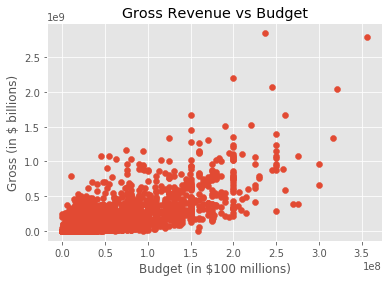

In [33]:
# Budget vs Gross
plt.scatter(x = df['budget'], y = df['gross'])
plt.xlabel('Budget (in $100 millions)')
plt.ylabel('Gross (in $ billions)')
plt.title('Gross Revenue vs Budget')
plt.show()

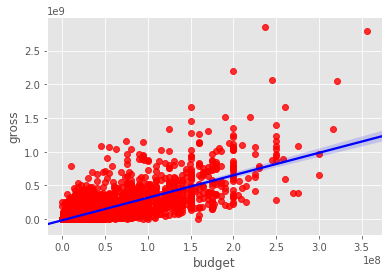

In [34]:
# Lets make do a regression analysis on this data.
sns.regplot(x = df['budget'], y = df['gross'], scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

Looking at this regression plot, we can say that budget and gross revenue are positively correlated. 

Lets start looking at correlations!

### Correlations

In [35]:
df.corr(method = "pearson")

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.327781,0.257486,0.114698
score,0.091821,1.000000,0.413096,0.071792,0.186258,0.397287
votes,0.215740,0.413096,1.000000,0.440021,0.630757,0.309535
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318594
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245215
runtime,0.114698,0.397287,0.309535,0.318594,0.245215,1.000000


We see that there exists a high positive correlation between budget and gross revenue. Hence, our first hypthoses was right!. There is a positive relation between release year and gross but it is not high. 

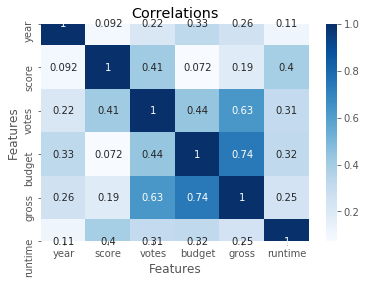

In [36]:
# Plotting this correlation matrix 
correlation_matrix = df.corr(method = "pearson")
sns.heatmap(correlation_matrix, annot = True, cmap = "Blues")
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlations')
plt.show()

Some observations that can be made from this data is that
- Gross revenue has a postive correlation with all of the numeric features. 
- There is a moderate-high positive correlation between gross revenue and votes.
- There is a high positive correlation between budget and gross revenue.
- There is a suprisingly low positive correlation between the score and gross revenue. 
- There is a low positive correlaion between year of release and gross revenue.

Lets see our 3rd hypotheses, which maps rating to the gross revenue

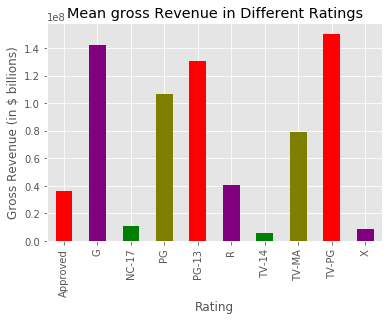

In [37]:
# Mapping using bar charts
df.groupby('rating')['gross'].mean().plot.bar(color = ["red", "purple", "green", "olive"])
plt.title("Mean gross Revenue in Different Ratings")
plt.xlabel("Rating")
plt.ylabel("Gross Revenue (in $ billions)")
plt.show()

Our hypothesis was wrong. However, because TV-PG and G generally allow for a higher number of audiences who can legally watch, our logic is correct.

Some observations that can be made from this data is that
1. Gross revenue has a postive correlation with all of the numeric features. 
2. There is a moderate-high positive correlation between gross revenue and votes.
3. There is a high positive correlation between budget and gross revenue.
4. There is a suprisingly low positive correlation between the score and gross revenue. 
5. There is a low positive correlation between year of release and gross revenue.
6. TV-PG and G have the highest amount of mean gross revenues respectively.

A number of these observation make intuitive sense, such as number 2 and 3.

Observation number 4 helps us draw the conclusion that based on the score a movie gets from the critics, we can't confidently say that it will earn higher amounts of revenue.

The hypotheses behind observation 5 was that given the rise of multimedia services netflix and amazon prime, the reach of movies would increase and hence would the revenue it generates. Low positive correlation means that the rise has had a positive but not drastic effect on the generated revenue.  

## Thank You